In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('/home/paige/Documents/vocal_ambiguity/validation/valitation-pilot/trials.csv')

In [48]:
# Split into separate DataFrames based on keywords
pill_df = data[data['filename'].str.contains('pill')]
pill_response = pill_df[pill_df['Response'].isin([0, 1])]
pill_naturalness = pill_df[pill_df['Response'].isin([2, 3, 4, 5, 6, 7, 8, 9, 10])]
peel_df = data[data['filename'].str.contains('peel')]
peel_response = peel_df[peel_df['Response'].isin([0, 1])]
peel_naturalness = peel_df[peel_df['Response'].isin([2, 3, 4, 5, 6, 7, 8, 9, 10])]
full_df = data[data['filename'].str.contains('full')]
full_response = full_df[full_df['Response'].isin([0, 1])]
full_naturalness = full_df[full_df['Response'].isin([2, 3, 4, 5, 6, 7, 8, 9, 10])]
fool_df = data[data['filename'].str.contains('fool')]
fool_response = fool_df[fool_df['Response'].isin([0, 1])]
fool_naturalness = fool_df[fool_df['Response'].isin([2, 3, 4, 5, 6, 7, 8, 9, 10])]

In [57]:
def proportion_correct(df, word):
    if word == 'pill' or word == 'full':
        correct = 0
    else:
        correct = 1
    result = (
        df.groupby('filename')
        .agg(
            total_count=('filename', 'size'),                     # Total number of rows for each file name
            count_response_0=('Response', lambda x: (x == correct).sum()) # Count where response is 0
        )
        .assign(percentage_response_0=lambda x: (x['count_response_0'] / x['total_count']) * 100) # Percentage of response 0
        .reset_index()
    )
    print(result)

    result['numeric_part'] = result['filename'].str.split('-').str[0]

    result = result.sort_values('numeric_part')

    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result['numeric_part'], y=result['percentage_response_0'], marker='o')
    
    # Customize plot labels and title
    plt.xlabel('context multiplier')
    plt.ylabel(f'Percentage of Response = {word}')
    plt.title(f'Percentage of Response = {word} for {word} ground truth files')
    plt.grid(True)
    plt.show()

In [66]:
def average_naturalness(df, word):
    # Calculate the average response for each unique file name
    avg_response_df = df.groupby('filename', as_index=False)['Response'].mean()
    
    # Rename the 'response' column to 'average_response' for clarity
    avg_response_df.rename(columns={'Response': 'average_response'}, inplace=True)

    print(avg_response_df)

    avg_response_df['numeric_part'] = avg_response_df['filename'].str.split('-').str[0]

    avg_response_df = avg_response_df.sort_values('numeric_part')

    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=avg_response_df['numeric_part'], y=avg_response_df['average_response'], marker='o')
    
    # Customize plot labels and title
    plt.xlabel('context multiplier')
    plt.ylabel(f'Average')
    plt.title(f'average naturalness response')
    plt.grid(True)
    plt.show()

             filename  average_response
0     0.67-2-pill.wav             6.925
1   0.71-1.8-pill.wav             7.050
2   0.77-1.6-pill.wav             7.025
3   0.83-1.4-pill.wav             6.975
4    0.9-1.2-pill.wav             7.075
5        1-1-pill.wav             6.975
6   1.1-0.83-pill.wav             7.200
7   1.2-0.71-pill.wav             7.150
8   1.3-0.63-pill.wav             7.075
9   1.4-0.55-pill.wav             6.850
10   1.5-0.5-pill.wav             6.500


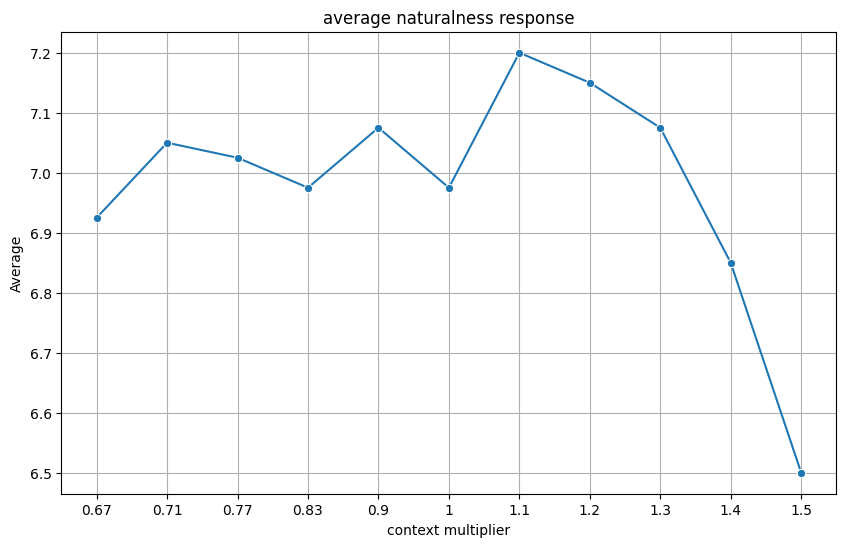

In [67]:
average_naturalness(pill_naturalness, 'pill')

             filename  total_count  count_response_0  percentage_response_0
0     0.67-2-pill.wav           40                19              47.500000
1   0.71-1.8-pill.wav           42                25              59.523810
2   0.77-1.6-pill.wav           43                24              55.813953
3   0.83-1.4-pill.wav           45                25              55.555556
4    0.9-1.2-pill.wav           41                25              60.975610
5        1-1-pill.wav           43                33              76.744186
6   1.1-0.83-pill.wav           42                31              73.809524
7   1.2-0.71-pill.wav           43                31              72.093023
8   1.3-0.63-pill.wav           41                35              85.365854
9   1.4-0.55-pill.wav           41                30              73.170732
10   1.5-0.5-pill.wav           40                33              82.500000
             filename  total_count  count_response_0  percentage_response_0  \
0     0.6

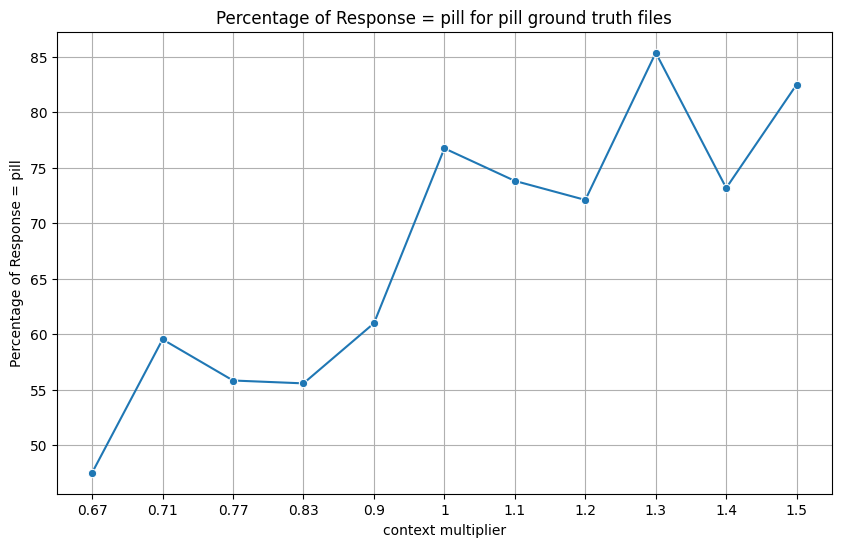

In [56]:
proportion_correct(pill_response, 'pill')

             filename  total_count  count_response_0  percentage_response_0
0     0.67-2-peel.wav           40                39              97.500000
1   0.71-1.8-peel.wav           41                38              92.682927
2   0.77-1.6-peel.wav           42                37              88.095238
3   0.83-1.4-peel.wav           40                32              80.000000
4    0.9-1.2-peel.wav           48                39              81.250000
5        1-1-peel.wav           41                29              70.731707
6   1.1-0.83-peel.wav           40                20              50.000000
7   1.2-0.71-peel.wav           43                26              60.465116
8   1.3-0.63-peel.wav           44                26              59.090909
9   1.4-0.55-peel.wav           43                 8              18.604651
10   1.5-0.5-peel.wav           44                17              38.636364


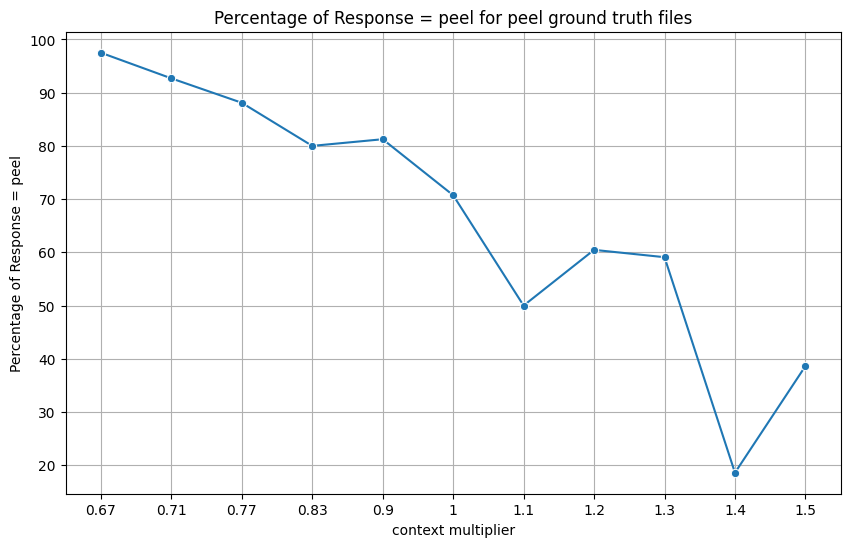

In [68]:
proportion_correct(peel_response, 'peel')

             filename  average_response
0     0.67-2-peel.wav             6.550
1   0.71-1.8-peel.wav             6.875
2   0.77-1.6-peel.wav             7.025
3   0.83-1.4-peel.wav             6.900
4    0.9-1.2-peel.wav             7.050
5        1-1-peel.wav             7.175
6   1.1-0.83-peel.wav             6.800
7   1.2-0.71-peel.wav             6.950
8   1.3-0.63-peel.wav             6.875
9   1.4-0.55-peel.wav             6.900
10   1.5-0.5-peel.wav             6.425


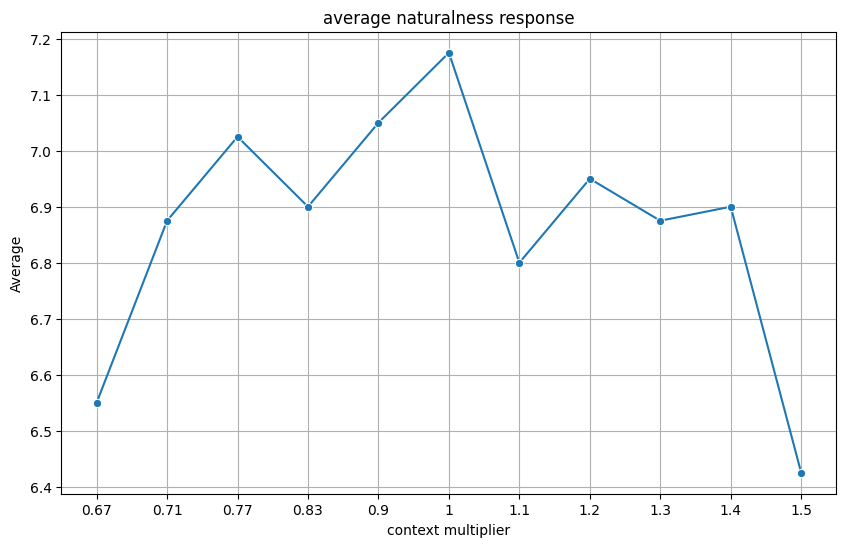

In [69]:
average_naturalness(peel_naturalness, 'peel')

             filename  total_count  count_response_0  percentage_response_0
0     0.67-2-full.wav           41                16              39.024390
1   0.71-1.8-full.wav           44                21              47.727273
2   0.77-1.6-full.wav           42                22              52.380952
3   0.83-1.4-full.wav           42                30              71.428571
4    0.9-1.2-full.wav           41                29              70.731707
5        1-1-full.wav           43                34              79.069767
6   1.1-0.83-full.wav           43                35              81.395349
7   1.2-0.71-full.wav           41                27              65.853659
8   1.3-0.63-full.wav           41                35              85.365854
9   1.4-0.55-full.wav           43                33              76.744186
10   1.5-0.5-full.wav           42                31              73.809524


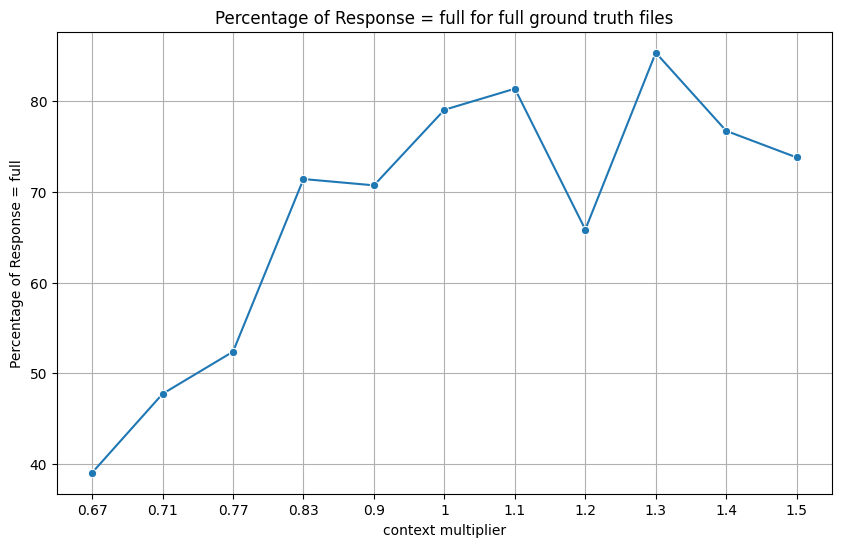

In [70]:
proportion_correct(full_response, 'full')

             filename  average_response
0     0.67-2-full.wav             6.550
1   0.71-1.8-full.wav             6.425
2   0.77-1.6-full.wav             6.325
3   0.83-1.4-full.wav             6.675
4    0.9-1.2-full.wav             6.500
5        1-1-full.wav             6.600
6   1.1-0.83-full.wav             6.600
7   1.2-0.71-full.wav             6.700
8   1.3-0.63-full.wav             6.600
9   1.4-0.55-full.wav             6.550
10   1.5-0.5-full.wav             6.525


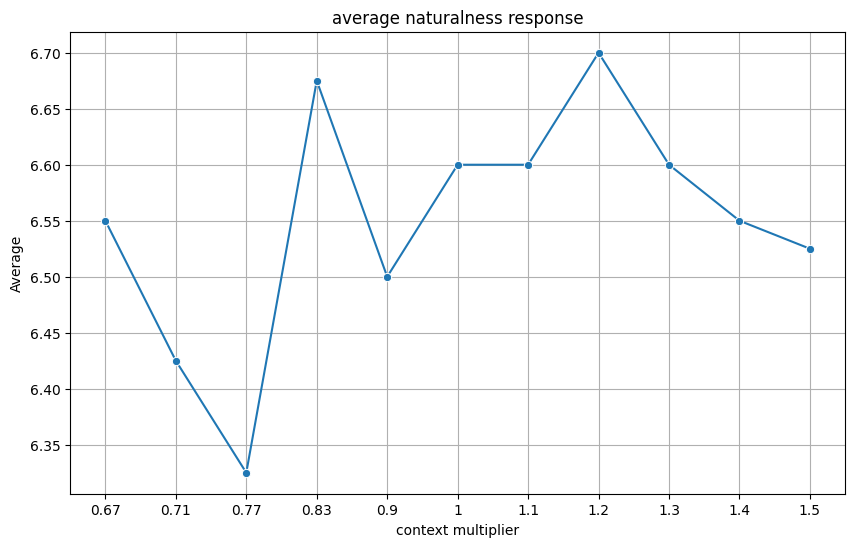

In [73]:
average_naturalness(full_naturalness, 'full')

             filename  total_count  count_response_0  percentage_response_0
0     0.67-2-fool.wav           43                28              65.116279
1   0.71-1.8-fool.wav           40                26              65.000000
2   0.77-1.6-fool.wav           42                22              52.380952
3   0.83-1.4-fool.wav           44                21              47.727273
4    0.9-1.2-fool.wav           41                 9              21.951220
5        1-1-fool.wav           43                10              23.255814
6   1.1-0.83-fool.wav           40                13              32.500000
7   1.2-0.71-fool.wav           40                 5              12.500000
8   1.3-0.63-fool.wav           42                11              26.190476
9   1.4-0.55-fool.wav           42                 6              14.285714
10   1.5-0.5-fool.wav           42                13              30.952381


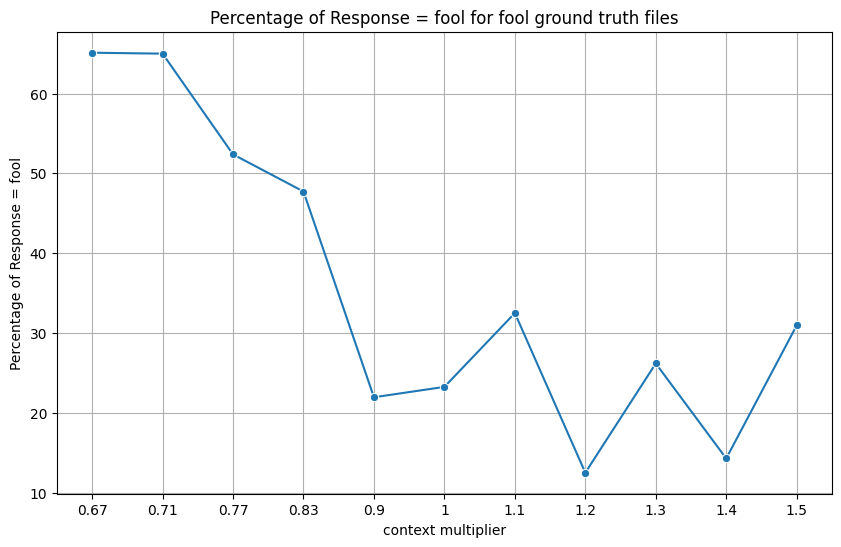

In [74]:
proportion_correct(fool_response, 'fool')

             filename  average_response
0     0.67-2-fool.wav             6.800
1   0.71-1.8-fool.wav             6.400
2   0.77-1.6-fool.wav             6.475
3   0.83-1.4-fool.wav             6.825
4    0.9-1.2-fool.wav             6.550
5        1-1-fool.wav             6.350
6   1.1-0.83-fool.wav             6.650
7   1.2-0.71-fool.wav             6.700
8   1.3-0.63-fool.wav             6.775
9   1.4-0.55-fool.wav             6.450
10   1.5-0.5-fool.wav             6.550


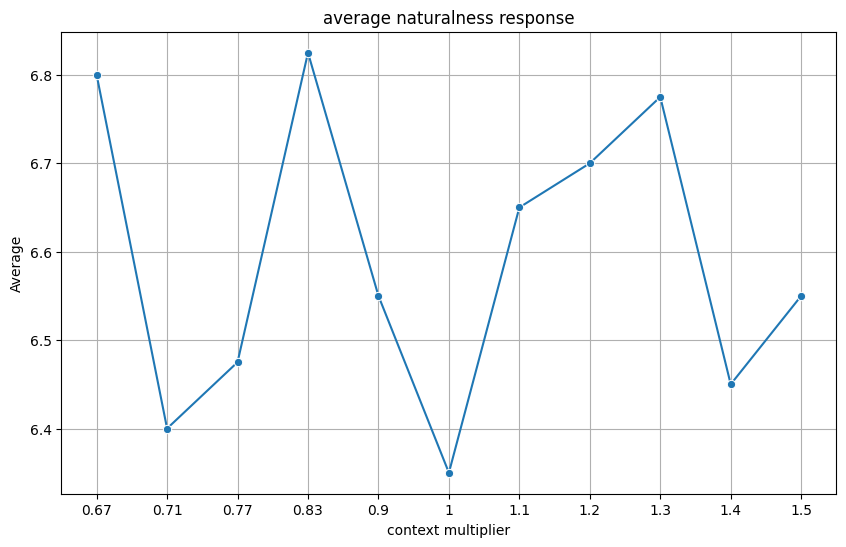

In [75]:
average_naturalness(fool_naturalness, 'fool')